# GROUP BRAVO FINAL PROJECT (Astry, Fabian)

# A. Problem Definition

Portuegese Bank notied that during May 2008 to November 2010, only few of Bank client agreed to open term deposit. This impacted on how the bank run the business such as : to put the money in more higher rate of return in financial product or to lend the money out to its other clients, thereby receiving a higher interest rate from the borrowers. The bank will not able to continue its bussiness if they have low in assets (in this case is money deposit from the client)

Our team works as Data Scientist in the Portuguese Bank to help business getting more valuable customer who will agree on the future campaign offer, thus increase marketing effieciency. In addition, we will try to define the probability group (in percentage) of customer who will agree to place term deposit.

# B. Business Questions

1. How to predict a successful marketing campaign via Telemarketing in order to increase valuable customer who will agree on future campaign offer ?

## Business Questions for Data Analysis
1. Which customer age group is the most targeted on previous campaign  ?
2. Does marital status impact on decision opening term deposit ?
3. Which job type tend to open the term deposit ?
4. How customer last education impact on opening term deposit ?
5. How the rest categorical feature impact on customer decision  ?
6. How socio economic attribute impact on customer decision ?
7. Based on previous campaign, when is the best time customer tend to say "yes" ?


# C. About Dataset

This dataset is describing Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'. It includes following fields:

| Field          | Description                                                                           | Data Type |
| -------------- | ------------------------------------------------------------------------------------- | ---------|
| **Bank Client Data**                                                                                   
| age            | Whether a loan is paid off on in collection| Int |
| job            | Type of Job                                                   | Categorical |
| marital        | Marital Status| Categorical |
| education      | Education Background                                       | Categorical |
| default        | Does customer have credit in default               | Categorical |
| housing        | Does customer have housing loan                                                                     | Categorical |
| loan           | Does customer have personal loan
| **Last Contact Details related to Campaign**                                                           | Categorical |
| contact        | Communication type                                                              | Categorical |
| month          | Last contact month                                                              | Categorical |
| day_of_week          Last contact days of week                                                             | Categorical |
| duration       |   Last contact duration                                                             | Int |
| **Attributes**                                                           |
| campaign        |  The gender of applicant                                                               | Int |
| pdays        | number of contacts performed during this campaign and for this client                                                               | Int |
| previous          | number of contacts performed before this campaign and for this client (numeric)                                                             | Int |
| poutcome          | outcome of the previous marketing campaign                                                                | Categorical |
| **Socio Economic Attr**                                                           |
| emp.var.rate       | employment variation rate : Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy| Int|
| cons.price.idx | consumer price index  :  measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services | Int|
| cons.conf.idx | consumer confidence index :  that measures how optimistic or pessimistic consumers are regarding their expected financial situation | Int|
| euribor3m | euribor 3 month rate - daily indicator :  serangkaian suku bunga referensi yang diterbitkan setiap hari oleh European Money Markets Institute | Int|
| nr.employed | number of employees - quarterly indicator| Int|
| y | Target Prediction | 


# D. Data Understanding

In [93]:
# Nanti semua import di masukin di awal aja

In [94]:
# For Dataset handling
import numpy as np
import pandas as pd

#For Correlation Checking
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u

# For Checking Distribution Data
from scipy.stats import chisquare, kstest, normaltest

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [95]:
df = pd.read_csv('bank-additional-full.csv', delimiter=";")

In [96]:
pd.set_option('display.max_columns', None)

In [97]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## D.1. Checking Data Proportion

In [98]:
((df['y'].value_counts()/len(df))*100).round(2)

no     88.73
yes    11.27
Name: y, dtype: float64

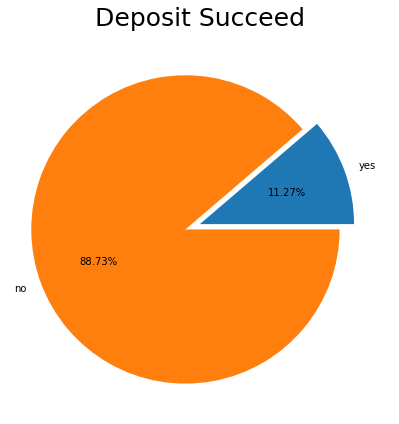

In [99]:
sizes = list(df['y'].value_counts().sort_values().values)
labels = list(df['y'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Deposit Succeed', fontsize=25)
plt.tight_layout()
plt.show()

We can see the data is imbalanced with proportion 88.73 % and 11.27 % for No and Yes anwers

## D.2 Checking Distribution Data

In [100]:
cek = ["age", "duration", "campaign","pdays","previous","emp.var.rate","cons.conf.idx"]

In [101]:
alpha = 0.05

In [102]:
for i in cek:
    print ([i])
    a, b = normaltest(df[i])
    print("statistic", a, "pvalue", b)
    if b < alpha :
        print("Distribution not normal")
    else :
        print("Distribution normal")



['age']
statistic 3904.8876514999647 pvalue 0.0
Distribution not normal
['duration']
statistic 30134.609343764896 pvalue 0.0
Distribution not normal
['campaign']
statistic 40280.13051119697 pvalue 0.0
Distribution not normal
['pdays']
statistic 38981.24259450561 pvalue 0.0
Distribution not normal
['previous']
statistic 33221.4758498975 pvalue 0.0
Distribution not normal
['emp.var.rate']
statistic 16401.626424804053 pvalue 0.0
Distribution not normal
['cons.conf.idx']
statistic 936.3737615560685 pvalue 4.6668213776494045e-204
Distribution not normal


## D.3 Checking Data Info and Statistical Data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Statistical Data for Numerical Features**

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**Statistical Data for Categorical Features**

In [105]:
df.describe(include = 'object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [106]:
dataDesc= []

for i in df.columns:
    dataDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0.0,78,"[44, 32, 33, 53, 29, 42, 31, 59, 35, 52, 38, 7..."
1,job,object,0,0.0,12,"[entrepreneur, services, blue-collar, admin., ..."
2,marital,object,0,0.0,4,"[single, married, divorced]"
3,education,object,0,0.0,8,"[basic.6y, basic.9y, professional.course, high..."
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[yes, no]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[jul, oct, apr, jun, aug, may, nov]"
9,day_of_week,object,0,0.0,5,"[mon, wed, fri, tue, thu]"


- From numerical descriptive result : 
    - "campaign", "age" and "cons.conf.idx" features having big differences between Q3 (75%) and max value. We need to check further this outliers in the boxplot and scatterplot
    - duration will be dropped as it has higher correlation with the result of the campaign as we will not know how long the duration will be before the telemarketing team performed the call.
- From categorical descriptive result :
    - there is unknown data for features : job ,marital ,education ,default, housing, loan. We will treat this unkown as missing value and we will fill in with modus value (higher frequency of each feature)
    - day_of_week features shows that previous calls are held during weekdays
    - month features hows that previous calls are not hold in January and February 

# E. Data Cleaning

## E.1 check duplicate values

In [107]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [108]:
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## E.2 Handling Missing Value

In [109]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column] = df[column].replace('unknown', np.NaN)

In [110]:
df.isna().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [111]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [112]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# E. Data Correlation and Outliers

we need to check the correlation of each features towards label 'y'. Besides, doing correlation checking for Feature Selection and EDA, this also would help to decide how to handle it if there is outliers

## E.1 Correlation Crammers V

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated

In [113]:
# Crammers V
categorical = df.select_dtypes('object').columns.to_list()

assoc_cramers = []
for i in  categorical:
    assoc = round(cramers_v(df['y'], df[i]),2)
    assoc_cramers.append(assoc)

In [114]:
df_cramers_v = pd.DataFrame(data=[assoc_cramers], columns=categorical, index=['y'])

<AxesSubplot:>

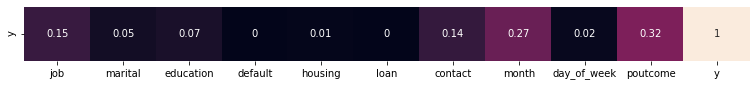

In [115]:
plt.figure(figsize = (13,1))
sns.heatmap(df_cramers_v, cbar = False, annot=True)

## E.2 Correlation Ratio

the correlation ratio is a measure of the curvilinear relationship between the statistical dispersion within individual categories

In [116]:
numerical = df.select_dtypes(['int64', 'float64']).columns.to_list()

assoc_corratio = []
for i in  numerical:
    assoc = round(correlation_ratio(df['y'], df[i]),2)
    assoc_corratio.append(assoc)

In [117]:
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [118]:
df_corr_ratio = pd.DataFrame(data=[assoc_corratio], columns=numerical, index=['y'])

<AxesSubplot:>

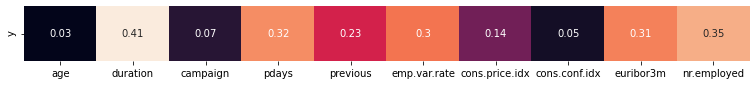

In [119]:
plt.figure(figsize = (13,1))
sns.heatmap(df_corr_ratio, cbar = False, annot=True)

## E.3 Handling Outliers

### Finding outliers

- From result in statistical data (point D.3), we checked outliers for Age, Campaign and cons.conf.idx features
- From correlation ratio, we got correlation value for Age and Campaign as much as 0.03 and 0.07 accordingly.

### 1. Age

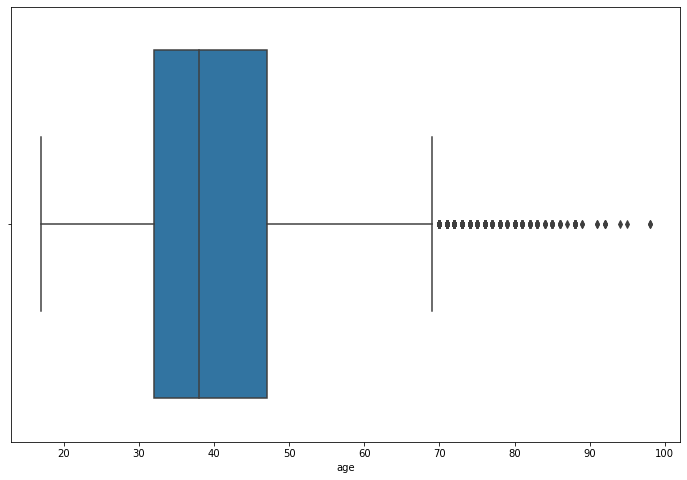

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", hue='y')

plt.show()

After knowing the outliers of age features, we need to know how diverse age outliers towards "job" features because "job" features has the highest crammers v correlation score and it might be impacted if we remove the outliers

<AxesSubplot:xlabel='age', ylabel='job'>

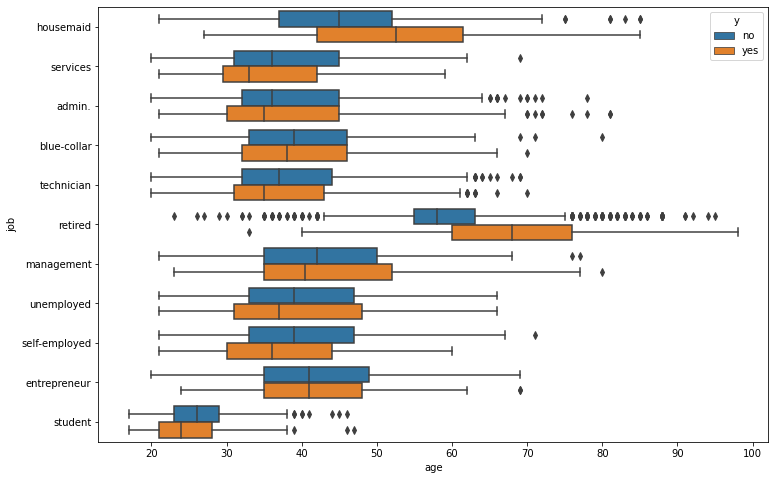

In [121]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", y="job", hue='y')

In [122]:
#df_out_age.info()

In [123]:
# Checking whether removing outliers will impact on Job crammer's v correlation
out_age = ['age'] # one or more

Q1 = df[out_age].quantile(0.25)
Q3 = df[out_age].quantile(0.75)
IQR = Q3 - Q1

# remove outliers on age and store in new data frame
df_out = df[~((df[out_age] < (Q1 - 1.5 * IQR)) |(df[out_age] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [124]:
df_cramers_v = pd.DataFrame(data=[assoc_cramers], columns=categorical, index=['y'])

<AxesSubplot:>

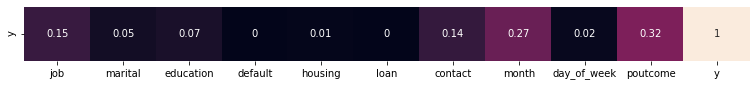

In [125]:
plt.figure(figsize = (13,1))
sns.heatmap(df_cramers_v, cbar = False, annot=True)

We could see that job crammer's v correlation is decrease if we remove age outliers. Thus, we're NOT removing outliers in "age" features

### 2. Campaign

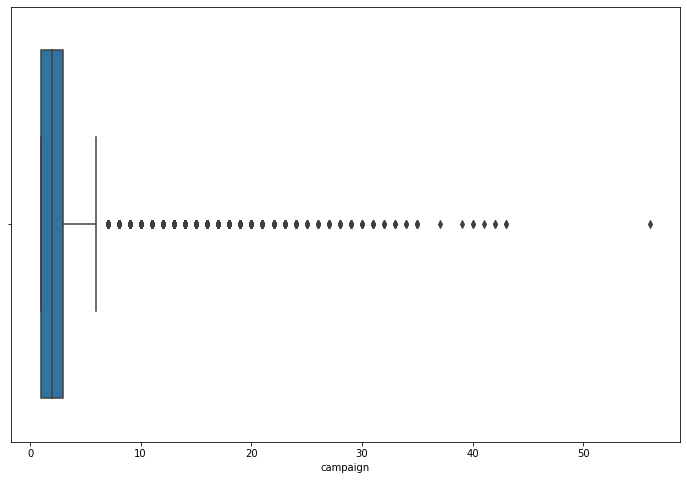

In [126]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="campaign", hue='y')

plt.show()

### 3. cons.conf.idx

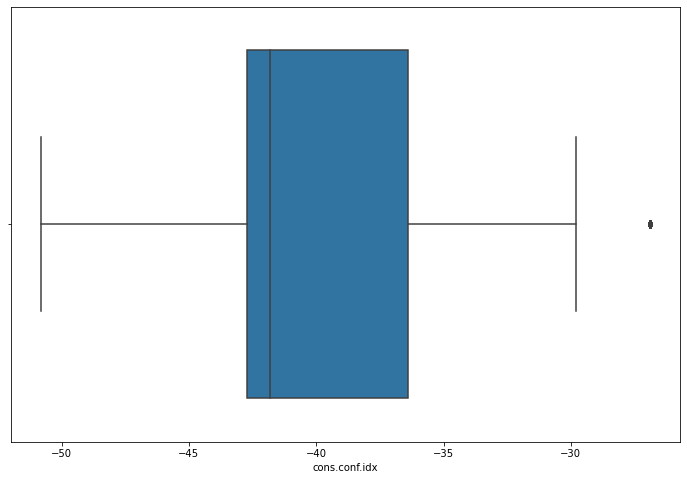

In [127]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", hue='y')

plt.show()

<AxesSubplot:xlabel='cons.conf.idx', ylabel='job'>

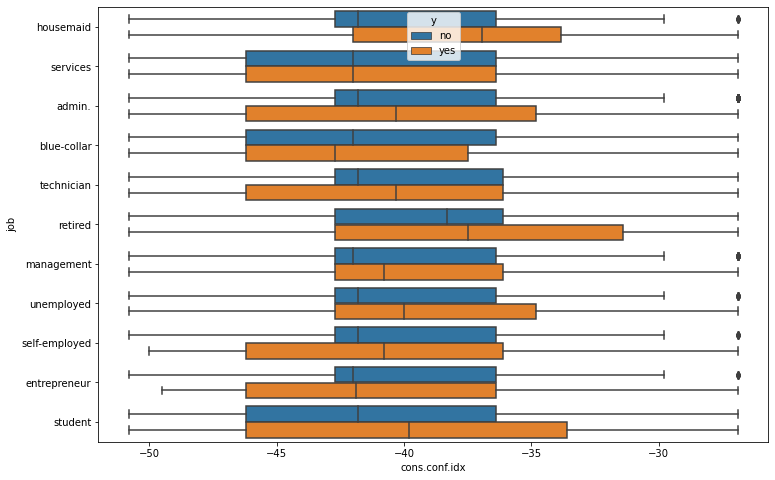

In [128]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", y="job", hue='y')

In [129]:
# Checking whether removing outliers will impact on Job crammer's v correlation
out = ['cons.conf.idx'] # one or more

Q1 = df[out].quantile(0.25)
Q3 = df[out].quantile(0.75)
IQR = Q3 - Q1

# remove outliers on age and store in new data frame
df_out = df[~((df[out] < (Q1 - 1.5 * IQR)) |(df[out] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [130]:
df_cramers_v = pd.DataFrame(data=[assoc_cramers], columns=categorical, index=['y'])

<AxesSubplot:>

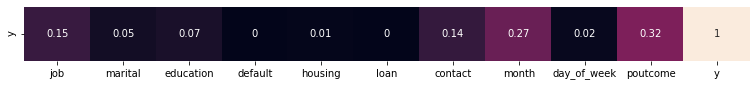

In [131]:
plt.figure(figsize = (13,1))
sns.heatmap(df_cramers_v, cbar = False, annot=True)

In [132]:
# Crammers V
categorical = df_out.select_dtypes('object').columns.to_list()

assoc_cramers = []
for i in  categorical:
    assoc = round(cramers_v(df_out['y'], df_out[i]),2)
    assoc_cramers.append(assoc)

We could see that job crammer's v correlation is decrease if we remove cons.conf.idx outliers. Thus, we're NOT removing outliers in "cons.conf.idx" features

# F. Exploratory Data Analysis

In [133]:
## checking data pattern of each column 

In [134]:
df['y'] = df['y'].apply(lambda y: 1 if y == 'yes' else 0)

## Which customer age group is the most targeted on previous campaign  ?

We categorize age into 3 groups :
16 - 31 = Young Adult
32 - 46 = Productive Adult
47 - 100 = Elderly

In [135]:
bin_age = [16, 32, 47, 100]
label_age = ['Young Adult', 'Productive Adult', 'Elderly']

In [136]:
df['age_group'] = pd.cut(df['age'], bins=bin_age, labels=label_age)

In [137]:
df['age_group'].value_counts()

Productive Adult    20132
Young Adult         11173
Elderly              9871
Name: age_group, dtype: int64

In [138]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly


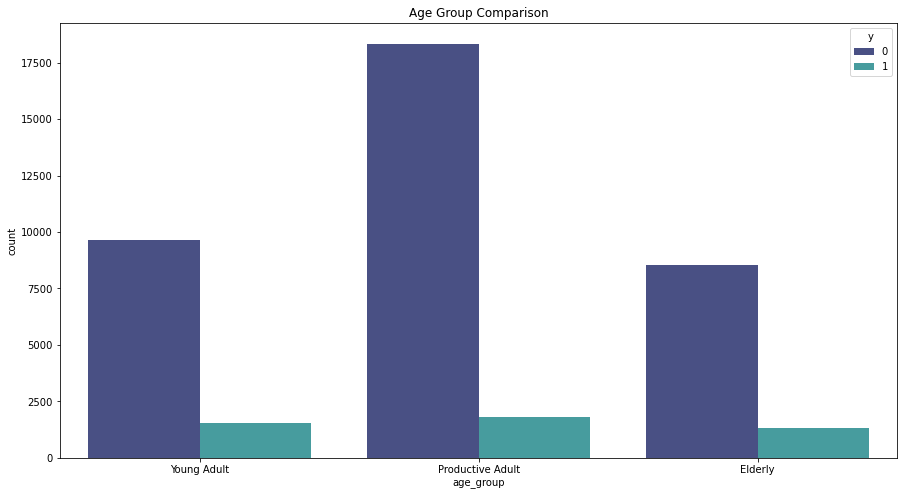

In [139]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["age_group"],hue=df["y"], data=df, palette='mako')
plt.title('Age Group Comparison')
plt.show()

In [140]:
age = ((pd.crosstab(index= df["age_group"], columns= df["y"], normalize="columns"))*100).round(2)
age
age.sort_values(1,ascending=False)

y,0,1
age_group,,
Productive Adult,50.2,38.59
Young Adult,26.4,32.94
Elderly,23.4,28.48


Age_group Adult have the highest percentage of customer (87.41%) agree to open the term deposit.

## Does marital status impact on decision opening term deposit ?

In [141]:
df['marital'].value_counts()

married     25001
single      11564
divorced     4611
Name: marital, dtype: int64

In [142]:
df['Marital_Status'] =  df['marital'].map({'married' : 'married','single': 'not married','divorced':'not married'})

In [143]:
df['Marital_Status'].value_counts()

married        25001
not married    16175
Name: Marital_Status, dtype: int64

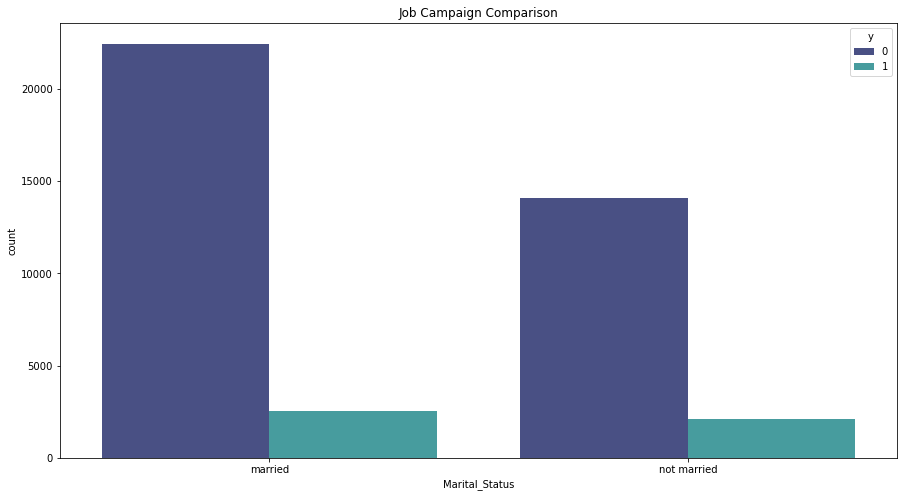

In [144]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Marital_Status"],hue=df["y"], data=df, palette='mako')
plt.title('Job Campaign Comparison')
plt.show()

In [145]:
Marital = ((pd.crosstab(index= df["Marital_Status"], columns= df["y"], normalize="columns"))*100).round(2)
Marital.sort_values(1,ascending=False)

y,0,1
Marital_Status,,
married,61.47,54.82
not married,38.53,45.18


Married people tend to opening the deposit with the percentage of 54.83%

## Which job type tend to open the term deposit ?

In [146]:
df['job'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [147]:
job_map = { 'entrepreneur' : 'self-employed'
    
}

df['Job_Type'] = df['job'].replace(job_map)
df['Job_Type'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
self-employed     2877
retired           1718
housemaid         1060
unemployed        1014
student            875
Name: Job_Type, dtype: int64

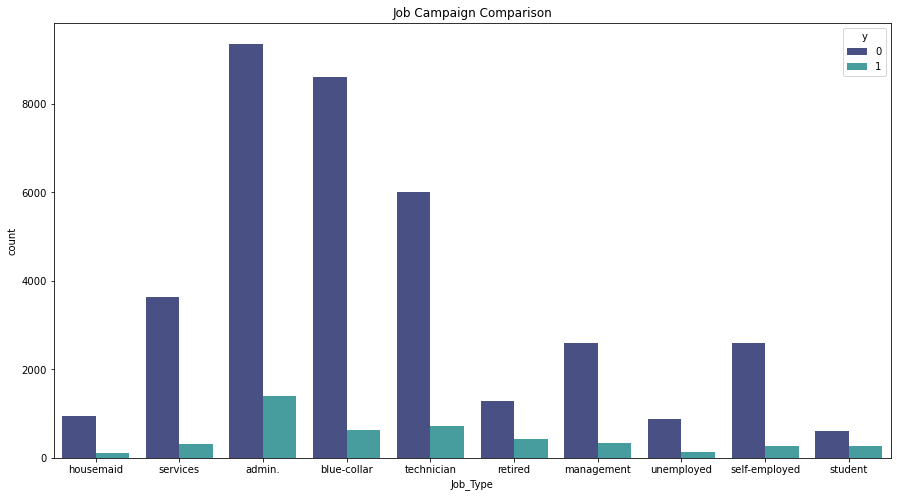

In [148]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Job_Type"],hue=df["y"], data=df, palette='mako')
plt.title('Job Campaign Comparison')
plt.show()

In [149]:
job = (pd.crosstab(index=df["Job_Type"], columns= df["y"], normalize= "index") *100).round(2)
job.sort_values(1, ascending=False)

y,0,1
Job_Type,,
student,68.57,31.43
retired,74.74,25.26
unemployed,85.80,14.20
admin.,87.09,12.91
management,88.78,11.22
technician,89.17,10.83
housemaid,90.00,10.00
self-employed,90.51,9.49
services,91.86,8.14


We can conclude that Job type Student, Retired and Unemployed customer are top 3 job type of customer who agree to open deposit term

## How customer last education impact on opening term deposit ?

In [150]:
df['education'].value_counts()

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [151]:
edu_map = { 'high.school' : 'school', 'basic.9y' : 'school', 'basic.4y' : 'school', 'basic.6y' : 'school'
    
}

df['Edu_Cat'] = df['education'].replace(edu_map)
df['Edu_Cat'].value_counts()

school                 22024
university.degree      13894
professional.course     5240
illiterate                18
Name: Edu_Cat, dtype: int64

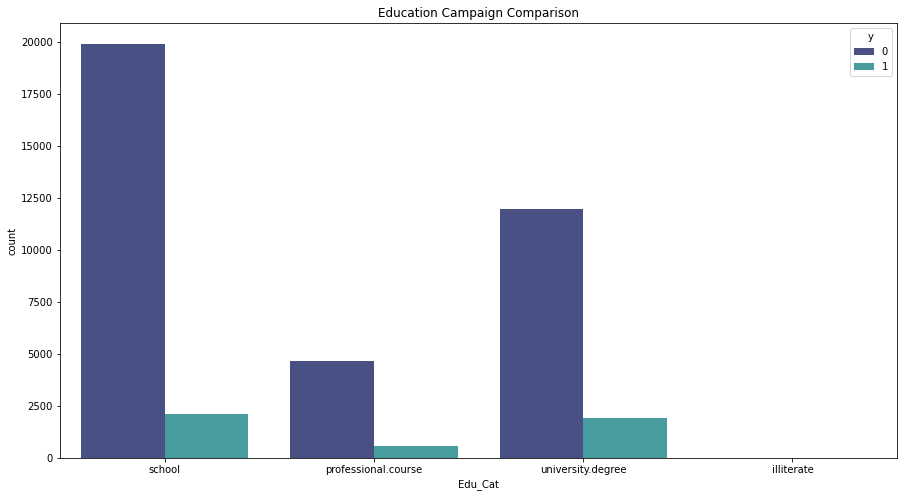

In [152]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Edu_Cat"],hue=df["y"], data=df, palette='mako')
plt.title('Education Campaign Comparison')
plt.show()

In [153]:
edu = (pd.crosstab(index=df["Edu_Cat"], columns= df["y"], normalize= "index") *100).round(2)
edu.sort_values(1, ascending=False)

y,0,1
Edu_Cat,,
illiterate,77.78,22.22
university.degree,86.18,13.82
professional.course,88.65,11.35
school,90.37,9.63


Customer with education background Illiterate tend to agree to open term deposit, it reach 22,22%. Following by education background as University Degree which is 13.82%

# How the rest categorical feature impact on customer decision ?

In [154]:
def pcat(x):
    if x == 999:
        return 'Never'
    else:
        return 'Yes'

In [155]:
df['pdays'] = df['pdays'].apply(pcat)

In [156]:
cat =['default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'pdays']
cat

['default', 'housing', 'loan', 'contact', 'poutcome', 'pdays']

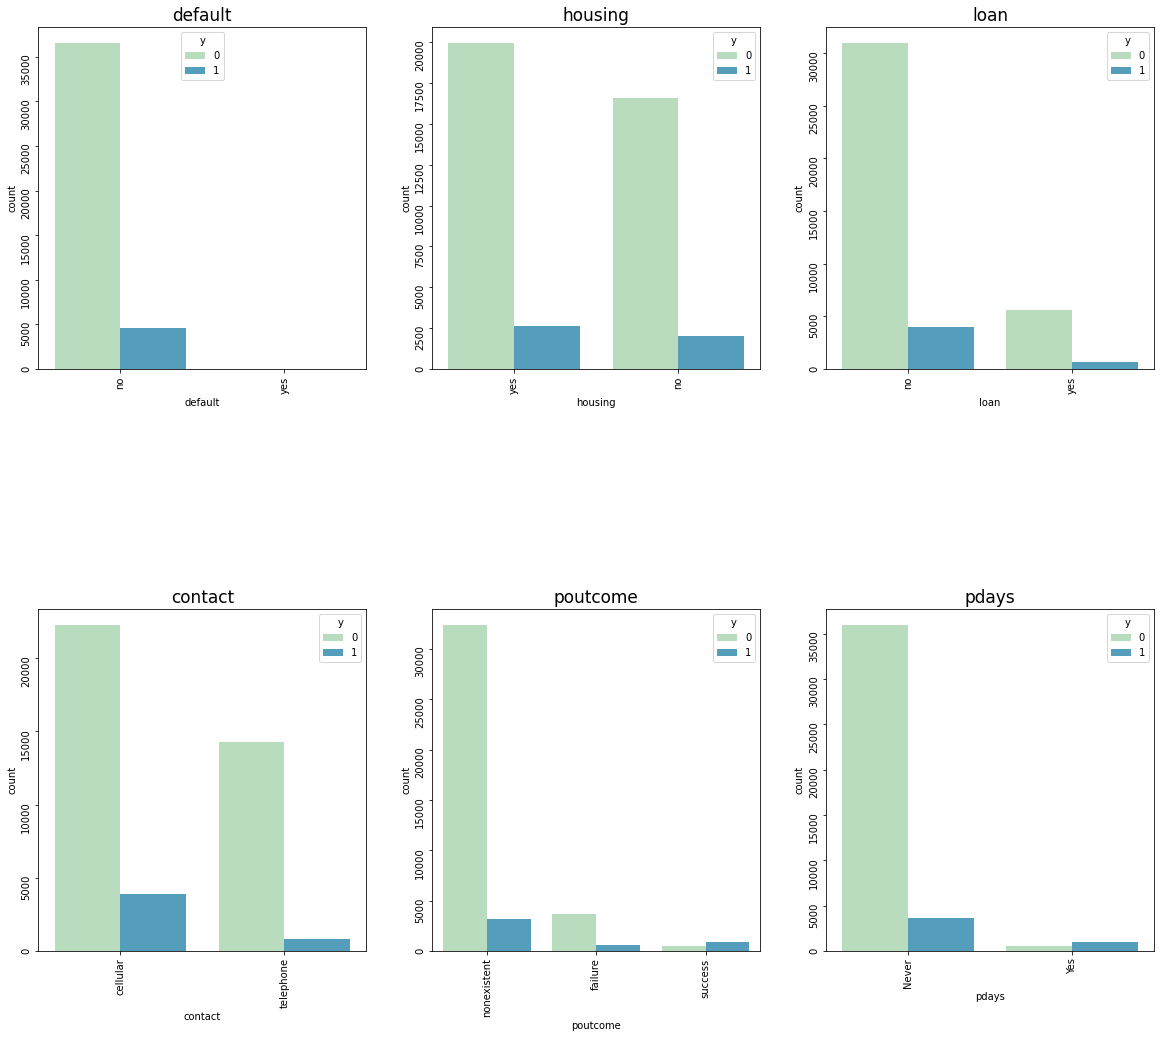

In [157]:
fig, ax = plt.subplots(2,3, figsize=(20,17))

cat 

ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

- Deafult, housing, loan and contact features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', is in line with the descends of the targeted number
- poutcome and pdays features are the past campaign result features. We conclude that customer which never called before is likely to have bigger proportions than customer which had called before

# How socio economic attribute impact on customer decision ?

In [158]:
socio_economic = df.select_dtypes(['int64', 'float64'])
socio_economic = socio_economic.drop(columns=['age','duration','campaign','previous','y'])
socio_economic.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


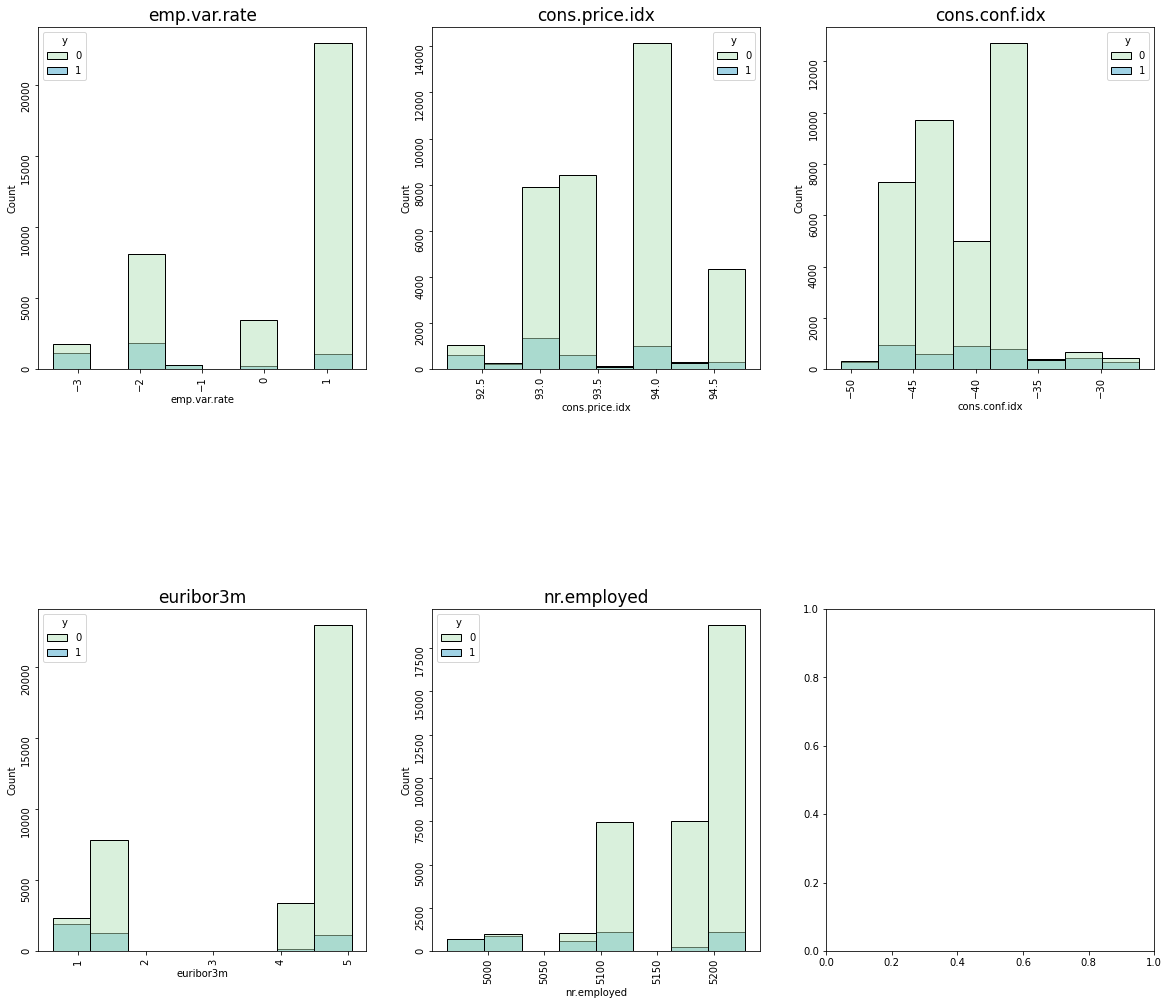

In [159]:
fig, ax = plt.subplots(2,3, figsize=(20,17))

socio_economic

ax = ax.ravel()
position = 0
for i in socio_economic:
    
    #order = df[i].value_counts().index
    sns.histplot(data=socio_economic, x=socio_economic[i], ax=ax[position], hue=df['y'], palette='GnBu', bins=8)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

# Based on previous campaign, when is the best time customer tend to say "yes" ?

In [160]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

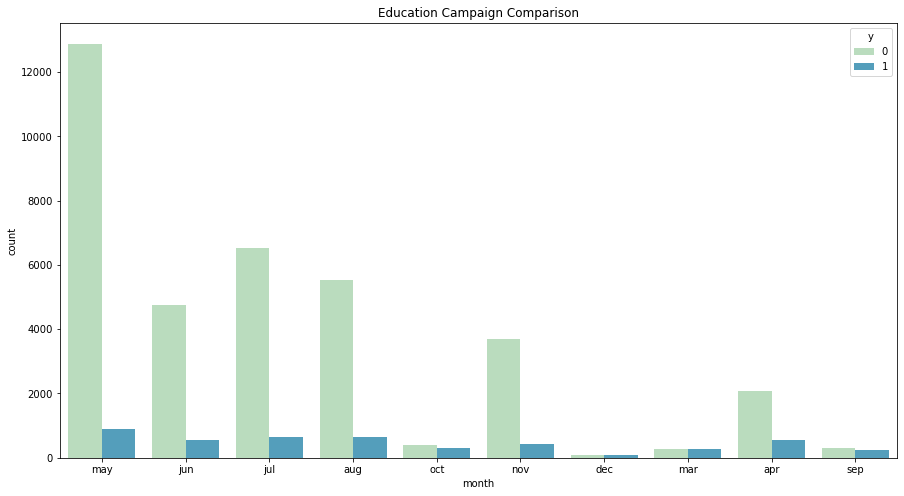

In [161]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['month'], hue='y', palette='GnBu')
plt.title('Education Campaign Comparison')
plt.show()


In [162]:
month = (pd.crosstab(index=df["month"], columns= df["y"], normalize= "index") *100).round(2)
month.sort_values(1, ascending=False)

y,0,1
month,,
mar,49.45,50.55
dec,51.10,48.90
sep,55.09,44.91
oct,56.07,43.93
apr,79.51,20.49
aug,89.39,10.61
jun,89.49,10.51
nov,89.85,10.15
jul,90.96,9.04


The highest percentage (50.55%) customer tend to say yes is on March, followed by December and September in the second and third place

In [163]:
comb = (pd.crosstab(index=[df["month"],df["day_of_week"]], columns= df["y"], normalize= "index")*100).round(2)
comb.sort_values(1, ascending=False).head(5)

y                      0      1
month day_of_week              
dec   tue          40.00  60.00
mar   wed          40.00  60.00
      tue          40.00  60.00
dec   wed          40.00  60.00
mar   fri          47.87  52.13

- We can see that December on Tuesday and Wednesday are the day when past campaign was getting the highest proportion of "yes" answer
- Following by March on Tuesday and Wednesday as well

# EDA Conclusion

1. Age_group Adult have the highest percentage of customer (87.41%) agree to open the term deposit. Following by young adult and elderly
2. Married customer tend to opening the deposit with the percentage of 54.83%, and Not Married customer falls for 45.15 % on agree for opening the deposit
3. We can conclude that Job type Student, Retired and Unemployed customer are top 3 job type of customer who agree to open deposit term
4. Customer with education background Illiterate tend to agree to open term deposit, it reach 22,22%. Following by education background as University Degree which is 13.82%
5. - Deafult, housing, loan and contact features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', is in line with the descends of the targeted number
   - poutcome and pdays features are the past campaign result features. We conclude that customer which never called before is likely to have bigger proportions than customer which had called before
6. - emp.var.rate : The proportion customer agree to open deposit is when emp.var.rate between -2 and -3
   - cons.price.idx : The proportion customer agree to open deposit is when euribor3m close to 93
   - cons.conf.idx : The proportion customer agree to open deposit varying across cons.conf.idx value
   - euribor3m : The proportion customer agree to open deposit is when euribor3m close to 1
7. - We can see that December on Tuesday and Wednesday are the day when past campaign was getting the highest proportion of "yes" answer
   - Following by March on Tuesday and Wednesday as well

# Machine Learning 

in this section all data we got from EDA analysis the will be handled to be used for Machine Learning, which will be tranform into numerical, we will use 3 encoding type to handle categorical data

- Binary Encoding
- Ordinal Encoding
- One-hot Encoding 

importing packgae for machine learning evaluation

In [165]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold

importing package for pipeline and feature engineering

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer

## feature handling

in this section we analyse the categorical feature to be then handled, and choosing between which encoder will be used

In [168]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid,school
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,services,school
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,admin.,school
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school


In [169]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [170]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [171]:
def marital_pre(basement):
    if basement == "married":
        return "married" 
    else :
        return "not married"

In [172]:
df["marital"] = df["marital"].apply(marital_pre)

In [173]:
df["marital"].unique()

array(['married', 'not married'], dtype=object)

marital column is handled to be married and not married

In [174]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [175]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [176]:
df["default"].value_counts()

no     41173
yes        3
Name: default, dtype: int64

In [177]:
df["housing"].unique()

array(['no', 'yes'], dtype=object)

In [178]:
df["housing"].value_counts()

yes    22561
no     18615
Name: housing, dtype: int64

In [179]:
df["loan"].unique()

array(['no', 'yes'], dtype=object)

In [180]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

All of the column below is droped because all this column won't be posible to be gathered when we want to check a possibility of the new data because it need to be happened first to obtain the data. 

In [181]:
df = df.drop(columns=["month"])
df = df.drop(columns=["day_of_week"])
df = df.drop(columns=["duration"])
df = df.drop(columns=["campaign"])

In [182]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid,school
1,57,services,married,high.school,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school
2,37,services,married,high.school,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,services,school
3,40,admin.,married,basic.6y,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,admin.,school
4,56,services,married,high.school,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school


In [183]:
df["pdays"].unique()

array(['Never', 'Yes'], dtype=object)

In [186]:
df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

age is drop because we re-categorized it by group of age 

In [187]:
df = df.drop(columns=["age"])

marital status also droped because it's a same with marital column

In [191]:
df = df.drop(columns=["Marital_Status"])

In [193]:
df["Job_Type"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'student'],
      dtype=object)

job column is droped because it's been recategorized into job type column

In [194]:
df = df.drop(columns=["job"])

In [196]:
df["Edu_Cat"].unique()

array(['school', 'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

education column is droped because it is been categorized into "edu_cat" 

In [197]:
df = df.drop(columns=["education"])

nr.employed is droped because this column's information is unkown

In [204]:
df = df.drop(columns=["nr.employed"])

In [205]:
df.head()

,marital,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Job_Type,Edu_Cat
0,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,housemaid,school
1,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,services,school
2,married,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,services,school
3,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,admin.,school
4,married,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,services,school


SUMMARY FOR FEATRUE HANDLING 

all the feature for machine learning will be handled as below

Ordinal Encoding:
    - Age Group 
    - Edu_Cat

One-hot Encoding:
    - poutcome
    - Job_Type

Binary Encoding:
    - Marital
    - Default
    - Housing
    - Loan
    - Contact
    - pdays

## DATA Spliting

Seperating the features with the outcome of the campaign that will be used in modeling

In [547]:
x = df.drop(columns='y')
y = df['y']

In [548]:
len(x)

41176

In [285]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

## Machine Learning Function

In [208]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score

insialisasi log_evaluation di buat untuk menjadi evaluation test dalam machine learning ini

In [209]:
def log_evaluation(data_sample_train,data_sample_test, aktual_train,aktual_test, model):
    hasil_model_train = model.predict(data_sample_train)
    accuracy_train = accuracy_score(aktual_train, hasil_model_train)
    recall_train = recall_score(aktual_train, hasil_model_train)
    precision_train = precision_score(aktual_train, hasil_model_train)
    f1_train = f1_score(aktual_train, hasil_model_train)
    rocauc_train = roc_auc_score(aktual_train,hasil_model_train)

    hasil_model_test = model.predict(data_sample_test)
    accuracy_test = accuracy_score(aktual_test, hasil_model_test)
    recall_test = recall_score(aktual_test, hasil_model_test)
    precision_test = precision_score(aktual_test, hasil_model_test)
    f1_test = f1_score(aktual_test, hasil_model_test)
    rocauc_test = roc_auc_score(aktual_test,hasil_model_test)
    
    cm = confusion_matrix(aktual_test, hasil_model_test, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = ["akt1", "akt0"],columns=["pred 1" , "pred 0"])
    cr = classification_report(aktual_test, hasil_model_test)


    hasil_evaluation = pd.DataFrame(data= {"Training" : [accuracy_train, recall_train, precision_train,f1_train,rocauc_train],"Testing" : [accuracy_test, recall_test, precision_test,f1_test,rocauc_test]}, index=["accuracy", "recall" , "precission", "F1 Score", "ROCAUC"] )

    return hasil_model_train, hasil_model_test, hasil_evaluation, df_cm, cr

## Pipeline Preprocessing

In [210]:
df.head()

,marital,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Job_Type,Edu_Cat
0,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,housemaid,school
1,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,services,school
2,married,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,services,school
3,married,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,admin.,school
4,married,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,services,school


In [276]:
num_columns = ['previous','emp.var.rate','cons.price.idx','cons.conf.idx',"euribor3m",]

cat_columns = ["marital", "default","housing","loan","contact","pdays","poutcome","Job_Type","age_group","Edu_Cat"]

binary_columns = ["marital", "default","housing","loan","contact","pdays"]

OH_columns = ["poutcome","Job_Type"]

ordinal1_columns = ["age_group"]

ordinal2_columns = ["Edu_Cat"]

ONE-HOT encoding digunakan karena ini adalah encoder yang robust dan bisa digunakan untuk beberapa macam category dan untuk categorical column ini tidak akan mempengaruhi kalkulasi dengan menggunakan one-hot encoder

In [296]:
df["pdays"].unique()

array(['Never', 'Yes'], dtype=object)

In [278]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [319]:
cat_age_lvl = [['Young Adult', 'Productive Adult', "Elderly"]]
cat_edu_lvl = [['illiterate', 'school', "professional.course","university.degree"]]

overview of the outcome:

- True Positif : kalau data aktual yes, data prediksi yes (1,1) quadrant 1 
- False Negatif : kalau data aktual yes, data prediksi no (1,0) quadrant 2
- False Positif : kalau data aktual no, data prediksi yes (0,1) quadrant 3
- True Negatif : kalau data aktual no, data prediksi no (0,0), dquadrant 4

Fokus yang kami lihat dalam analisis ini adalah evaluasi di recall yang dimana pada evaluation ini membandingkan tebakan dengan data actual yang ada. 

   - yang harus diperhatikan itu recall nya karena recall adalah **Jumlah Seluruh tebakan/prediksi BENAR di kelas Positive atau Negative** dibandingkan dg **Jumlah Seluruh Data Aktual Positive**


bila dilihat dari penjelasan quandrant di atas untuk analisi ini kami akan memfokuskan pada false negatif yang dimana itu dapat memberikan informasi yang salah bahwa customer yang seharusnya menjawab iya kepada campaign yang sedang dijalankan diprediksi no, yang dimana kami ingin meningkatkan efektifitas dalam marketing ini untuk meng-approach customer yang akan jawab yes. 

maka dari itu 
   - yang mau diminimalisir adalah False negatif, (1,0) quadrant 2 -> karena customer akan hilang jika aktual yes tapi prediksi no

dilain hal kami juga ingin menkonversi orang-orang yang pada awal nya akan menjawab no untuk menjawab yes dengan cara memberikan mereka promo atau bargain yang dapat merubah keputusan mereka dengan begitu kit adapat meningkatkan presentase dari orang yang akan menjawab yes maka dari 

   - yang mau diminimalisir adalah False positif, (0,1) quadrant 3 -> karena customer akan hilang jika aktual no tapi prediksi yes

dari objective kami yang telah di jabarkan maka dapat disimpukan bahwa memang fokus yang kami ambil adalah ingin mengurangi false negatif yang ada dalam analysis machine learning ini tetapi di lain hal false positif juga dapat memberikan dampak yang buruk bagi analysis ini maka dari itu kami harus menemukan formula yang tepat agar hasil yang di kelaurkan oleh model machine learning ini dapat memberikan hasil yang balance.

## Base Modeling

### LOGISTIC REGRESSION BASE MODEL

In [559]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
 
])

Pipe_lr = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression())

])

In [560]:
Pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
            

In [452]:
lr_hasil_train, lr_hasil_test, lr_evaluation, lr_cm, lr_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_lr)

In [453]:
lr_evaluation

,Training,Testing
accuracy,0.898937,0.898130
recall,0.190245,0.183190
precission,0.685437,0.677291
F1 Score,0.297827,0.288380
ROCAUC,0.589580,0.586053


In [454]:
lr_cm

,pred 1,pred 0
akt1,170,758
akt0,81,7227


In [455]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.68      0.18      0.29       928

    accuracy                           0.90      8236
   macro avg       0.79      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236



### SVM BASE MODEL

In [561]:


num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns)
    
])

Pipe_SVC = Pipeline([
    ('prep',preprocessor),
    ('algo',SVC(max_iter=400,probability=True))

])

In [445]:
Pipe_SVC.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['marital', 'default',
    

In [446]:
svm_hasil_train, svm_hasil_test, svm_evaluation, svm_cm, svm_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_SVC)

In [447]:
svm_evaluation

,Training,Testing
accuracy,0.717790,0.716003
recall,0.153867,0.143319
precission,0.084882,0.079308
F1 Score,0.109408,0.102111
ROCAUC,0.471627,0.466022


In [448]:
svm_cm

,pred 1,pred 0
akt1,133,795
akt0,1544,5764


In [449]:
print(svm_cr)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7308
           1       0.08      0.14      0.10       928

    accuracy                           0.72      8236
   macro avg       0.48      0.47      0.47      8236
weighted avg       0.79      0.72      0.75      8236



### KNN BASE MODEL

In [562]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns)
 
])

Pipe_knn = Pipeline([
    ('prep',preprocessor),
    ('algo',KNeighborsClassifier())

])

In [439]:
Pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['marital', 'default',
    

In [440]:
knn_hasil_train, knn_hasil_test, knn_evaluation, knn_cm, knn_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_knn)

In [441]:
knn_evaluation

,Training,Testing
accuracy,0.911718,0.889874
recall,0.351118,0.239224
precission,0.722684,0.524823
F1 Score,0.472615,0.328645
ROCAUC,0.667006,0.605860


In [442]:
knn_cm

,pred 1,pred 0
akt1,222,706
akt0,201,7107


In [443]:
print(knn_cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.52      0.24      0.33       928

    accuracy                           0.89      8236
   macro avg       0.72      0.61      0.63      8236
weighted avg       0.87      0.89      0.87      8236



### RANDOM FOREST BASE MODEL

In [563]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_rf = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier())

])

In [457]:
Pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
            

In [458]:
rf_hasil_train, rf_hasil_test, rf_evaluation, rf_cm, rf_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_rf)

In [459]:
rf_evaluation

,Training,Testing
accuracy,0.960231,0.884046
recall,0.680949,0.281250
precission,0.952507,0.475410
F1 Score,0.794155,0.353419
ROCAUC,0.838319,0.620921


In [460]:
rf_cm

,pred 1,pred 0
akt1,261,667
akt0,288,7020


In [461]:
print(rf_cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7308
           1       0.48      0.28      0.35       928

    accuracy                           0.88      8236
   macro avg       0.69      0.62      0.64      8236
weighted avg       0.86      0.88      0.87      8236



## IMPROVEMENT (HYPERTUNING PARAMETER)

insialiasasi k fold untuk nanti digunakan dalam hyperparameter tuning

In [356]:
skf = StratifiedKFold(n_splits=4)

### Logistic Regression

#### CLASS WEIGHT

In [354]:
Pipe_lr.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['marital', 'default', 'housing', 'loan',
                                     'contact', 'pdays', 'poutcome', 'Job_Type',
                                     'age_group', 'Edu_Cat'])])),
  ('algo', LogisticRegression())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'cons.conf.idx', 'e

In [357]:
weights = [0.10, 0.25, 0.50, 0.75, 0.9]
weights

[0.1, 0.25, 0.5, 0.75, 0.9]

In [462]:
pm_lr = {
    'algo__C' : np.arange(0,2,0.1),
    'algo__penalty' : ["l1","l2","elasticnet"],
    'algo__class_weight': [{0:x, 1:1.0-x} for x in weights]
}

In [463]:
gs_lr = gs_lr = GridSearchCV(Pipe_lr, pm_lr, cv=skf, n_jobs=-1, verbose=-1, scoring="recall")

In [464]:
gs_lr.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m']),
                                                                        ('categoric1',
                                           

In [465]:
gs_lr.best_params_

{'algo__C': 0.1, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__penalty': 'l2'}

In [466]:
lr_cw = gs_lr.best_estimator_

In [467]:
lr_cw_hasil_train, lr_cw_hasil_test, lr_cw_evaluation, lr_cw_cm, lr_cw_cr = log_evaluation(x_train, x_test, y_train, y_test, lr_cw)

In [468]:
lr_cw_evaluation

,Training,Testing
accuracy,0.736460,0.744900
recall,0.694422,0.718750
precission,0.254544,0.266055
F1 Score,0.372533,0.388355
ROCAUC,0.718110,0.733486


In [469]:
lr_cw_cm

,pred 1,pred 0
akt1,667,261
akt0,1840,5468


In [470]:
print(lr_cw_cr)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7308
           1       0.27      0.72      0.39       928

    accuracy                           0.74      8236
   macro avg       0.61      0.73      0.61      8236
weighted avg       0.88      0.74      0.79      8236



#### OVERSAMPLING

In [409]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.fit_transform(x_test)

In [714]:
df_sample = pd.concat([x_train,y_train],axis=1)

In [715]:
accept = df_sample[df_sample['y'] == 1] ##class minority
reject = df_sample[df_sample['y'] == 0] ##class majority

In [680]:
from sklearn.utils import resample

In [681]:
accept_oversample = resample(accept, ##kelas minority
                            replace = True,#data asli di replace karena udah disampling
                            n_samples = len(reject), ## kelas majoritylen
                            random_state = 42)

In [682]:
len(reject)

29229

In [683]:
len(accept_oversample)

29229

In [684]:
df_oversample = pd.concat([accept_oversample, reject])

In [386]:
df_oversample.dtypes

marital             object
default             object
housing             object
loan                object
contact             object
pdays               object
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
y                    int64
age_group         category
Job_Type            object
Edu_Cat             object
dtype: object

In [387]:
df_oversample.replace([np.inf, -np.inf], np.nan, inplace=True)

In [388]:
df_oversample.isna().sum()

marital           0
default           0
housing           0
loan              0
contact           0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
age_group         0
Job_Type          0
Edu_Cat           0
dtype: int64

In [685]:
x_train_os = df_oversample.drop(columns='y')
y_train_os = df_oversample['y']

In [686]:
pm_lr_os = {
    'algo__C' : np.arange(0,2,0.1),
    'algo__penalty' : ["l2","none"]
    
}

In [687]:
gs_lr_os = GridSearchCV(Pipe_lr, pm_lr_os, cv=skf, n_jobs=-1, verbose=-1,scoring = "recall")

In [688]:
gs_lr_os.fit(x_train_os,y_train_os)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m']),
                                                                        ('categoric1',
                                           

In [689]:
gs_lr_os.best_params_

{'algo__C': 0.2, 'algo__penalty': 'l2'}

In [690]:
lr_os = gs_lr_os.best_estimator_

In [705]:
lr_os_hasil_train, lr_os_hasil_test, lr_os_evaluation, lr_os_cm, lr_os_cr = log_evaluation(x_train_os, x_test, y_train_os, y_test, lr_os)

In [706]:
lr_os_evaluation

,Training,Testing
accuracy,0.723135,0.766391
recall,0.679565,0.701509
precission,0.744434,0.283290
F1 Score,0.710522,0.403596
ROCAUC,0.723135,0.738070


In [707]:
lr_os_cm

,pred 1,pred 0
akt1,651,277
akt0,1647,5661


In [708]:
print(lr_os_cr)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      7308
           1       0.28      0.70      0.40       928

    accuracy                           0.77      8236
   macro avg       0.62      0.74      0.63      8236
weighted avg       0.88      0.77      0.80      8236



### KNN 

In [435]:
Pipe_knn.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['marital', 'default', 'housing', 'loan',
                                     'contact', 'pdays', 'poutcome', 'Job_Type',
                                     'age_group', 'Edu_Cat'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'cons.conf.idx', 

In [436]:
pr_knn = {
    "algo__n_neighbors" : np.arange(1,5,2) ,
    "algo__weights" : ["uniform", "distance"] ,
    "algo__p" : [1,2] ,
}

In [437]:
gs_knn = GridSearchCV(Pipe_knn, pr_knn ,cv=skf,n_jobs=-1,verbose=-1, scoring = "recall")

In [472]:
gs_knn.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m']),
                                                                        ('categoric1',
                                           

In [473]:
gs_knn.best_params_

{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__weights': 'uniform'}

In [474]:
knn_t = gs_knn.best_estimator_

In [674]:
knn_t_hasil_train, knn_t_hasil_test, knn_t_evaluation, knn_t_cm, knn_t_cr = log_evaluation(x_train, x_test, y_train, y_test, knn_t)

In [675]:
knn_t_evaluation

,Training,Testing
accuracy,0.945112,0.849441
recall,0.745621,0.300647
precission,0.762049,0.320690
F1 Score,0.753746,0.310345
ROCAUC,0.858031,0.609888


In [676]:
knn_t_cm

,pred 1,pred 0
akt1,279,649
akt0,591,6717


In [677]:
print(knn_t_cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7308
           1       0.32      0.30      0.31       928

    accuracy                           0.85      8236
   macro avg       0.62      0.61      0.61      8236
weighted avg       0.85      0.85      0.85      8236



### SVM 

In [481]:
Pipe_SVC.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', RobustScaler())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['marital', 'default', 'housing', 'loan',
                                     'contact', 'pdays', 'poutcome', 'Job_Type',
                                     'age_group', 'Edu_Cat'])])),
  ('algo', SVC(max_iter=400, probability=True))],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                          

In [491]:
weights1 = np.arange(0.1,1.0,0.1)
weights1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [492]:
pm_svm = {
    "algo__C" : np.arange(1,20,1),
    "algo__gamma" : np.arange(1,20,1),
    'algo__class_weight': [{0:x, 1:1.0-x} for x in weights]
    
}

In [493]:
gs_svm = RandomizedSearchCV(Pipe_SVC, pm_svm, cv = skf, n_jobs=-1,verbose = -1, random_state=42, scoring="accuracy")

In [494]:
gs_svm.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                           

In [495]:
gs_svm.best_params_

{'algo__gamma': 10,
 'algo__class_weight': {0: 0.9, 1: 0.09999999999999998},
 'algo__C': 12}

In [496]:
svm_t = gs_svm.best_estimator_

In [497]:
svmt_hasil_train, svmt_hasil_test, svmt_evaluation, svmt_cm, svmt_cr = log_evaluation(x_train, x_test, y_train, y_test, svm_t)

In [498]:
svmt_evaluation

,Training,Testing
accuracy,0.888221,0.887688
recall,0.008623,0.008621
precission,0.914286,0.615385
F1 Score,0.017085,0.017003
ROCAUC,0.504260,0.503968


In [500]:
svm_cm

,pred 1,pred 0
akt1,133,795
akt0,1544,5764


In [501]:
print(svmt_cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7308
           1       0.62      0.01      0.02       928

    accuracy                           0.89      8236
   macro avg       0.75      0.50      0.48      8236
weighted avg       0.86      0.89      0.84      8236



### Random Forest

In [502]:
Pipe_rf.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['marital', 'default', 'housing', 'loan',
                                     'contact', 'pdays', 'poutcome', 'Job_Type',
                                     'age_group', 'Edu_Cat'])])),
  ('algo', RandomForestClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'cons.conf.idx'

In [503]:
weights2 = np.arange(0.05,0.9,0.05)
weights2

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85])

In [504]:
pm_rf = {
    'algo__n_estimators': np.arange(10,1500,10),
    'algo__max_depth': np.arange(0,200,1),
    'algo__min_samples_split' : np.arange(1,200,1),
    'algo__min_samples_leaf': np.arange(1,200,1),
    'algo__class_weight': [{0:x, 1:1.0-x} for x in weights1],
    "algo__random_state" : [42]

}

In [505]:
gs_rft = RandomizedSearchCV(Pipe_rf, pm_rf, cv = skf, n_jobs=-1,verbose = -1,scoring="balanced_accuracy", random_state= 3)

In [506]:
gs_rft.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m']),
                                                                      

In [507]:
gs_rft.best_params_

{'algo__random_state': 42,
 'algo__n_estimators': 1110,
 'algo__min_samples_split': 105,
 'algo__min_samples_leaf': 63,
 'algo__max_depth': 88,
 'algo__class_weight': {0: 0.1, 1: 0.9}}

In [508]:
rf_t = gs_rft.best_estimator_

In [799]:
rft_hasil_train, rft_hasil_test, rft_evaluation, rft_cm, rft_cr = log_evaluation(x_train, x_test, y_train, y_test, rf_t)

In [800]:
rft_evaluation

,Training,Testing
accuracy,0.816758,0.816780
recall,0.663164,0.673491
precission,0.339589,0.341344
F1 Score,0.449170,0.453063
ROCAUC,0.749711,0.754233


In [801]:
rft_cm

,pred 1,pred 0
akt1,625,303
akt0,1206,6102


In [802]:
print(rft_cr)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7308
           1       0.34      0.67      0.45       928

    accuracy                           0.82      8236
   macro avg       0.65      0.75      0.67      8236
weighted avg       0.88      0.82      0.84      8236



## Machine Learning Overview

Melihat dari 4 algoritma yang sudah dibuat dan dilakukan modeling, kami menyimpulkan bahwa kedua algoritma yang memberikan hasil yang memenuhi kebutuhan dalam project ini adalah logistic regression dan juga random forest. yang dimana kedua algoritma ini akan kami analysis lebih lanjut pada chapter ini.

### Logisitic Regression analysis

Base Model and Hyperparameter result

Notes: base model terletak pada sisi kiri dan imporvement dari model yang sebelah kanan

In [524]:
pd.concat([lr_evaluation,lr_cw_evaluation], axis= 1)

,Training,Testing,Training,Testing
accuracy,0.898937,0.898130,0.736460,0.744900
recall,0.190245,0.183190,0.694422,0.718750
precission,0.685437,0.677291,0.254544,0.266055
F1 Score,0.297827,0.288380,0.372533,0.388355
ROCAUC,0.589580,0.586053,0.718110,0.733486


In [525]:
pd.concat([lr_cm,lr_cw_cm], axis= 1)

,pred 1,pred 0,pred 1,pred 0
akt1,170,758,667,261
akt0,81,7227,1840,5468


In [522]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.68      0.18      0.29       928

    accuracy                           0.90      8236
   macro avg       0.79      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236



In [526]:
print(lr_cw_cr)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7308
           1       0.27      0.72      0.39       928

    accuracy                           0.74      8236
   macro avg       0.61      0.73      0.61      8236
weighted avg       0.88      0.74      0.79      8236



terlihat dari perbandingan antara kedua hasil model bahwa model yang menggunakan class weight dan juga hyperparameter tuning memiliki kenaikan hasil yang cukup signifikan dimana telah kami jelaskan di awal dari analysis ini bahwa tujuan yang ingin kami cari pada modeling ini adalah untuk fokus kepada recall yang dimana ini membandingkan antara prediksi dengan seluruh data aktual yang ada, dan juga kami ingin bagaimana mengurangi false negatif seminim mungkin agar kita mendpatkan hasil positif sebanyak mungkin dari keseluruhan data yang ada.

kenaikan hasil yang terjadi cukup terlihat jelas pada recall positif dari 0.18 menjadi 0.72 dengan menaiknya recall positif mengakibatkan ada nya kompensasi yang terjadi pada model nya yang bisa di lihat pada confusion matrix bahwa false positif yang tadi nya sudah sangat minim menjadi naik tetapi bila melihat keseluruhan model, model yang sudah di improve menggunakan hypermeter tuning mengalami perubahan yang cukup bagus

### Random Forest Analysis

Base Model and Hyperparameter result

Notes: base model terletak pada sisi kiri dan imporvement dari model yang sebelah kanan

In [803]:
pd.concat([rf_evaluation,rft_evaluation], axis= 1)

,Training,Testing,Training,Testing
accuracy,0.960231,0.884046,0.816758,0.816780
recall,0.680949,0.281250,0.663164,0.673491
precission,0.952507,0.475410,0.339589,0.341344
F1 Score,0.794155,0.353419,0.449170,0.453063
ROCAUC,0.838319,0.620921,0.749711,0.754233


In [529]:
pd.concat([rf_cm,rft_cm], axis= 1)

,pred 1,pred 0,pred 1,pred 0
akt1,261,667,625,303
akt0,288,7020,1206,6102


In [530]:
print(rf_cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7308
           1       0.48      0.28      0.35       928

    accuracy                           0.88      8236
   macro avg       0.69      0.62      0.64      8236
weighted avg       0.86      0.88      0.87      8236



In [531]:
print(rft_cr)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7308
           1       0.34      0.67      0.45       928

    accuracy                           0.82      8236
   macro avg       0.65      0.75      0.67      8236
weighted avg       0.88      0.82      0.84      8236



sama seperti analysis diatas yang dimana kami memfokuskan untuk menminimalisir false negatif untuk benar2 memaksimalkan hasil orang yang kemungkinan untuk menajawab yes terhadap campaign yang nnti nya akan dilakukan. 

pada model random forest berikut, terlihat hasil peningkatan yang cukup signifikan dari hasil evaluasi recall positif yang di mana pada basemodel recall positif sebesar 0.28 yang mengalami kenaikan setelah menggunakan hyperparameter tuning menjadi 0.67 dan juga bila kita lihat pada recall negatif walaupun ada nya kenaikan apda recall positif tetapi pada recall negatif tidak mengalami penurunan yang cukup drastis. 

yang dimana bila kita lihat pada confusion matrix bahwa adanya penurunan false negatif yang cukup signifikan tetapi peningkatan pada false positif yang tidak signifikan bila melihat dari jumlah keseluruhan data aktual. 

dan juga bila kita melihat accuracy dan nilai dari ROC_AUC model ini yang cukup bagus

## Final Result

berikut adalah perbandingan hasil kedua model yang terbaik dari analysis yang telah di lakukan antara Logistic Regression dan Random Forest

Notes: Logistic Regression terletak pada sisi kiri dan Random Forest dari model yang sebelah kanan

In [805]:
pd.concat([lr_cw_evaluation,rft_evaluation], axis= 1).round(2)

,Training,Testing,Training,Testing
accuracy,0.74,0.74,0.82,0.82
recall,0.69,0.72,0.66,0.67
precission,0.25,0.27,0.34,0.34
F1 Score,0.37,0.39,0.45,0.45
ROCAUC,0.72,0.73,0.75,0.75


In [533]:
pd.concat([lr_cw_cm,rft_cm], axis= 1)

,pred 1,pred 0,pred 1,pred 0
akt1,667,261,625,303
akt0,1840,5468,1206,6102


In [534]:
print(rft_cr)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7308
           1       0.34      0.67      0.45       928

    accuracy                           0.82      8236
   macro avg       0.65      0.75      0.67      8236
weighted avg       0.88      0.82      0.84      8236



In [535]:
print(lr_cw_cr)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7308
           1       0.27      0.72      0.39       928

    accuracy                           0.74      8236
   macro avg       0.61      0.73      0.61      8236
weighted avg       0.88      0.74      0.79      8236



jika kita melihat kedua model diatas terlihat bahwa Logistic Regression memiliki recal positif yang lebih baik yang dimana itu terefleksikan pada confusion matrix dimana nilai false negatif yang dimiliki dari model logistic regression juga lebih rendah dari nilai false negatif modle random forest, tetapi bila kita melihat keseluruhan analysis yang dimana bila kita melihat ke false positif yang dimiliki oleh model logistic regression terlihat bahawa adanya perbedaan yang cukup jauh anatara 1840 dan 1206 yang dimana false positif pada model ini akan menimbukan kerugian dalam mengimplementasikan marketing strategy yang ada yang di mana kita ingin menaikan tingkat konversi dari tele marketing akar lebih baik dengan memberikan promo kepada nasabah. 

dan juga bila kila melihat dari keseluruhan model random forest memiliki accuracy, precission, f1 score, dan ROC_AUC yang lebih baik dan juga pebedaan recall positif kedua model tersebut hanya berbeda 5% yang di mana itu dapat disimpulkan kecil, melihat pada aspek kesuluruhan dari model kedua nya kami menyimpulkan bahwa Random Forest model adalah model yang terbaik digunakan untuk case ini dikarenakan kestabilan dari model tersebut dan juga hasil evaluasi yang balance dan juga tepat kepada kasus yang ingin kami selesaikan. 

## Probability

Dari hasil model yang telah kita pilih kita dapat mengeluarkan probability dari hasil prediksi tersebut dengan menggunakan predict_proba, yang dimana hasil dari predict proba dapat digunakan sebagai threshold yang akan menentukan promo apa yang akan diberikan kepada nasabah yang bersangkutan. 

In [544]:
hasil_probability = rf_t.predict_proba(x)

In [545]:
tabel_probability = pd.DataFrame(hasil_probability)
tabel_probability

,0,1
0,0.774405,0.225595
1,0.791106,0.208894
2,0.736224,0.263776
3,0.846074,0.153926
4,0.787817,0.212183
...,...,...
41171,0.164172,0.835828
41172,0.243217,0.756783
41173,0.167362,0.832638
41174,0.194308,0.805692


In [546]:
tabel_probability[1].round(1)

0        0.2
1        0.2
2        0.3
3        0.2
4        0.2
        ... 
41171    0.8
41172    0.8
41173    0.8
41174    0.8
41175    0.8
Name: 1, Length: 41176, dtype: float64

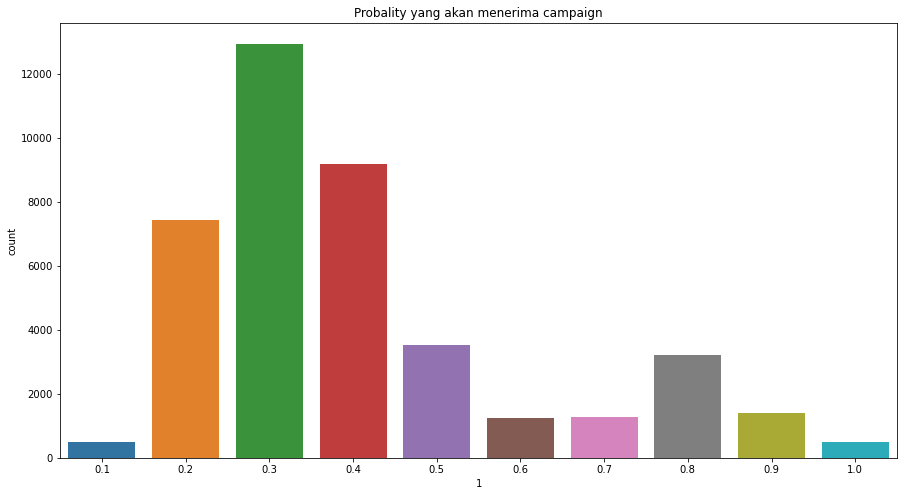

In [556]:
plt.figure(figsize=(15, 8))
sns.countplot(x= tabel_probability[1].round(1) , data=tabel_probability)
plt.title('Probality yang akan menerima campaign')
plt.show()

In [552]:
tabel_akhir = tabel_probability[1].round(1)

In [553]:
tabel_akhir.value_counts()

0.3    12948
0.4     9181
0.2     7424
0.5     3532
0.8     3219
0.9     1387
0.7     1262
0.6     1257
1.0      484
0.1      482
Name: 1, dtype: int64

Dari hasil analysis probability diatas maka terlihat bahwa probability dengan besat 0.3 mempunyai value yang sangat banyak yang dimana berarti itu adalah possible customer yang akan menolak campaign yang dilakukan oleh team marketing

dengan adanya hasil tersebut kita dapat membuat threshold dimana probability dengan:

- 0.1 - 0.2 : Diabakan       
- 0.3 - 0.5 : diberikan promo terbaik kelas 1 (GROUP 1)
- 0.6 - 0.8 : diberikan promo kelas 2  (GROUP 2)
- 0.8 > : tidak perlu diberikan promo (GROUP 3)

Dengah threshold yang ada maka kita dapat memfokusan promo dan budget marketing yang kita miliki tepat sasaran dan dapat meningkatkan konversi customer yang akan menjawab ya pada campaign yang kita berikan, dan juga meningkatkan efisiensi dalam telemarketing. 

## SIMULASI KEUNTUNGAN

Data berdasarkan bank indonesia

https://www.bi.go.id/id/statistik/ekonomi-keuangan/seki/Default.aspx

rata-rata suku bunga pertahun dari kelompok-kelompok bank adalah 15.5%


Kita asumsikan orang yang tertarik dengan campaign ini meminjam sekitar 50 juta rupiah 

In [808]:
50000000 * 0.155

7750000.0

bank mendapatkan 7 juta rupiah per tahun dari bunga 1 customer yang meminjam dr campaign ini

bila kita ingin mengkonversiakn group 1 dan group 2 kita akan memberikan promo kepada mereka yang berupa:

- Group 1 mendapatkan HP seharga 5 juta rupiah
- Group 2 mendapatkan Headset bluetooth seharga 2 juta rupiah

maka profit yang didapat sebesar 
- group 1 = 2 juta rupiah per tahun per nasabah
- group 2 = 5 juta rupiah per tahun per nasabah

In [809]:
(12948 + 9181 + 3532)/3 

8553.666666666666

rata-rata group 1 yang menerima campaign sekitar 8 ribu orang 

In [810]:
2000000 * 8000

16000000000

total keuntungan dari nasabah group 1 adalah 16 miliar rupiah per tahun

In [811]:
(1257 + 1262 + 3219)/3

1912.6666666666667

rata-rata group 2 yang menerima campaign sekitar 1 ribu orang

In [812]:
1000 * 5000000

5000000000

jumlah keuntungan dari group 2 adalah 5 miliar rupiah per tahun

In [814]:
(1387 + 484)/2

935.5

rata-rata penerima campaign untuk group 3 adalah 900 orang

In [815]:
900 * 7000000

6300000000

keuntungan yang di dapat dari group 3 adalah 6 miliar per tahun

posibility keuntungan seluruh nya dari campaign ini sebesar 27 miliar rupiah, berdasarkan dataset yang digunakan yang memiliki sampel sebesar 41 ribu sampel